In [40]:
# import libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.layers import Reshape

In [2]:
# load data
gen_df = pd.read_csv('D:/data/Multi_Label_dataset/train.csv')

In [3]:
gen_df.shape

(7254, 27)

In [4]:
gen_df.isnull().sum()

Id             0
Genre          0
Action         0
Adventure      0
Animation      0
Biography      0
Comedy         0
Crime          0
Documentary    0
Drama          0
Family         0
Fantasy        0
History        0
Horror         0
Music          0
Musical        0
Mystery        0
N/A            0
News           0
Reality-TV     0
Romance        0
Sci-Fi         0
Short          0
Sport          0
Thriller       0
War            0
Western        0
dtype: int64

In [5]:
gen_df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### image conversion to numpy arrays

In [6]:
width = 300
height = 300
X = []
for i in tqdm(range(gen_df.shape[0])):
    path = 'D:/data/Multi_Label_dataset/Images/'+gen_df['Id'][i]+'.jpg'
    img = image.load_img(path,target_size=(width, height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)
X = np.array(X)

100%|██████████████████████████████████████████████████████████████████████████████| 7254/7254 [02:04<00:00, 58.25it/s]


MemoryError: Unable to allocate 7.30 GiB for an array with shape (7254, 300, 300, 3) and data type float32

In [17]:
#reducing array size 
lim_gen_df = gen_df.head(2300)
width = 350
height = 350
X = []
for i in tqdm(range(lim_gen_df.shape[0])):
    path = 'D:/data/Multi_Label_dataset/Images/'+lim_gen_df['Id'][i]+'.jpg'
    img = image.load_img(path,target_size=(width, height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)
    
X = np.array(X)

100%|██████████████████████████████████████████████████████████████████████████████| 2300/2300 [00:43<00:00, 53.10it/s]


In [18]:
X.shape

(2300, 350, 350, 3)

In [19]:
y = lim_gen_df.drop(['Id','Genre'],axis=1)
y = y.to_numpy()
y.shape

(2300, 25)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

### Model

In [45]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))

In [37]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
trans = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
65/65 [==============================] - 271s 4s/step - loss: 0.7357 - accuracy: 0.0957 - val_loss: 0.5467 - val_accuracy: 0.3304
Epoch 2/5
65/65 [==============================] - 249s 4s/step - loss: 0.4846 - accuracy: 0.2251 - val_loss: 0.3230 - val_accuracy: 0.1696
Epoch 3/5
65/65 [==============================] - 235s 4s/step - loss: 0.3026 - accuracy: 0.2966 - val_loss: 0.2430 - val_accuracy: 0.1696
Epoch 4/5
65/65 [==============================] - 220s 3s/step - loss: 0.2558 - accuracy: 0.3135 - val_loss: 0.2414 - val_accuracy: 0.1696
Epoch 5/5
65/65 [==============================] - 283s 4s/step - loss: 0.2388 - accuracy: 0.3324 - val_loss: 0.2448 - val_accuracy: 0.1696


In [27]:
X_train.shape

(2070, 350, 350, 3)

In [26]:
y_train.shape

(2070, 25)

In [30]:
def plotcurve(trans, epochs):
    epochRange = range(1,epochs+1)
    plt.plot(epochRange,trans.history['accuracy'])
    plt.plot(epochRange,trans.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train','Validation'],loc='best')
    plt.show()

    plt.plot(epochRange,trans.history['loss'])
    plt.plot(epochRange,trans.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train','Validation'],loc='best')
    plt.show()

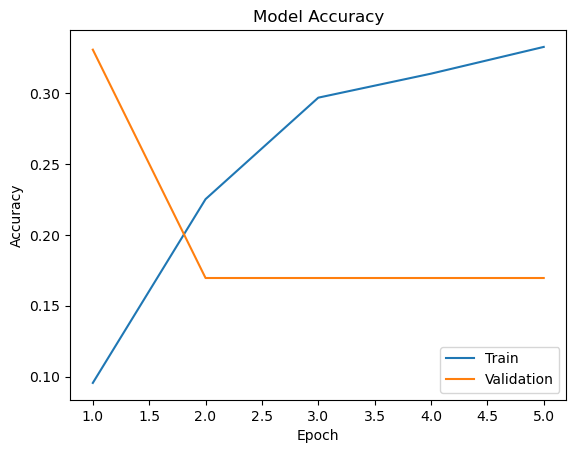

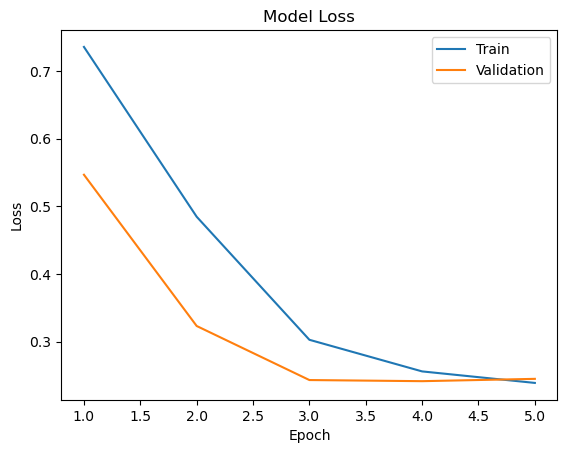

In [31]:
plotcurve(trans, 5)

1/1 [==============================] - 0s 44ms/step
Drama
Romance
Comedy


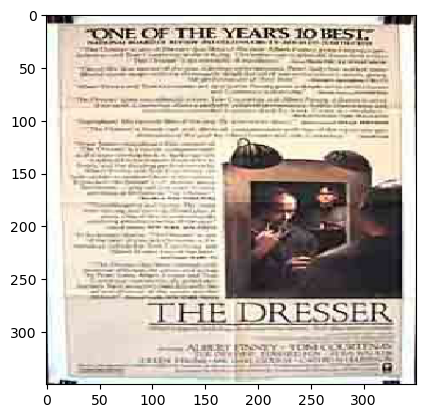

In [35]:
img = image.load_img('D:/data/Multi_Label_dataset/Images/tt0085461.jpg',target_size=(width,height,3))
#img = image.load_img('D:/data/aladdin.jpg',target_size=(width,height,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,width,height,3)
classes = lim_gen_df.columns[2:]
y_pred = model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
  print(classes[top3[i]])